# Study of symmetric and asymmetric fission of Flevorium-288

## by Yuliia Hrabar

## Table of content 
* [Intructions on how to run the notebook](#run)
* [Abstract](#abstract)

* [Importing python packages](#import)

* [Reading simulation data from files](#read)
    * [Extracting information from root trees](#root)
    * [Storing extracted ROOT data as DataFrame into ASCII file](#ascii)
    * [Loading data from an ASCII file](#loading)

* [Asymmetric fission case](#asymmetric)
    * [Constructing  a histogram for implantation detector ](#histo_imp)
    * [Constructing  a histogram for box detectors ](#histo_box)
    * [Energy deposited in implantation vs box detectors](#imp_box)
        * [Events that were registered both at implantation detector and box detectors at the same time](#same)
        * [All events registered at the implantation detector and box detectors](#all_events)

* [Results of all simulations](#all_simulations)
    * [Plots of all simulations](#plots_all)
    * [Plot selected simulation](#plot_selected)


## Instructions on how to run the notebook <a name="run"></a>


## Abstract <a name="abstract"></a>

The purpose of this _jupyter notebook_ is to analyze the data produced from simulating fission of Super Heavy Element (SHE) Flevorium and TASISpec detector setup. 

The data was produced by simulating [TASISpec](https://portal.research.lu.se/portal/files/3183833/4004479.pdf) detector setup in [Geant4](https://geant4.web.cern.ch/). Geant4 is a toolkit for simulating the passage of particles through matter. TASISpec setup combines composite Ge- and Si-detectors (shown on Figure 1 in blue and surrounded by green respectively) for a new detector setup aimed towards multi-coincidence gamma -ray, X-ray, conversion electron, fission fragment, and a-particle spectroscopy of the heaviest nuclei. 

 <figure>
  <img src="tasispec.jpg" alt="Drawing" style="width: 350px;" align="center">
  <figcaption style="text-align:center">Figure 1 - The full virtual TASISpec setup.  All the Ge-crystals are depicted in blue and Si-detectors are surrounded by green colour. </figcaption>
</figure> 

Main detectors of interest from the TASISpec setup for the simulation of fission products are four double-sided silicon strip detectors (DSSSDs) constructing a 'box detector' and one DSSSD facing a particle beam line - an 'implantation detector' (Figure 2). 
 <figure>
  <img src="dsssds.jpg" alt="Drawing" style="width: 250px;" align="center">
  <figcaption style="text-align:center">Figure 2 - Si-detectors: the implantation detector and box DSSSDs.[1](https://www.sciencedirect.com/science/article/pii/S0168900211021425#f0020)</figcaption>
</figure> 

Fission of Flevorium-288 was simulated in Geant4 in the following way: two fission products were implanted in the implantation detector at the depth of $ 4 \mu m$, and position randomly selected from a 2D gaussian distribution. Vector of momentum direction was randomly assigned to one fission product and the second fission product had momentum direction opposite to the first one. 3x3 scenarios were simulated - two cases of asymmetric fission (A1/A2 = 0.38 and 0.73) and a case of symmetric fission (A1/A2 = 1) for total kinetic energies of 225, 250 and 275 MeV. Parameters such as atomic number, mass number and kinetic energies of fission fragments used for the scenarios are presented in the following table. 

| TKE [MeV] | A1 | A2 | E1 [MeV] | E2 [MeV] | Z1 | Z2 |
|------|------|------|------|------|------|------|
| 225 	| 80.0 	| 208.0 | 162.5000 | 62.5000  | 35.0 | 79.0 |  
| 225 	| 122.0 | 166.0 | 129.6875 | 95.3125  | 51.0 | 63.0 | 	
| 225 	| 144.0 | 144.0 | 112.5000 | 112.5000 | 59.0 | 55.0 | 
| 250 	| 80.0 	| 208.0 | 180.5556 | 69.4444  | 35.0 | 79.0 | 
| 250 	| 122.0 | 166.0 | 144.0972 | 105.9028 | 51.0 | 63.0 | 
| 250 	| 144.0 | 144.0 | 125.0000 | 125.0000 | 59.0 | 55.0 | 	
| 275 	| 80.0 	| 208.0 | 198.6111 | 76.38889 | 35.0 | 79.0 | 
| 275 	| 122.0 | 166.0 | 158.5069 | 116.4931 | 51.0 | 63.0 | 
| 275 	| 144.0 | 144.0 | 137.5000 | 137.5000 | 59.0 | 55.0 | 

The main idea behind the study is to investigate based on simulations if TASISpec set-up (including dead layers) is sensitive to asymmetric fission during real experiments for creating Flevorium.

The data analysis can roughly be divided into four steps:
1. Read simulated data from ROOT files into pandas DataFrame
2. Maniplate and group data to plot histograms for implantation and box detectors 
3. Maniplate and group data to plot energy deposited in the implant detector vs. box detectors



# Importing python packages<a name="import"></a>

In [1]:
import ROOT
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/02


# Reading simulation data from files<a name="read"></a>

## Extracting information from ROOT trees <a name="root"></a>

Extracting information from ROOT trees into pandas DataFrame. 

In [2]:
# # Creating DataFrame to fill from ROOT data files
# data = pd.DataFrame({'TKE': [], 'A1': [], 'A2': [], 'Event': [], 'Energy': [], 'DetID': []}) 
# data

In [3]:
# import os
# import glob
# import re
# for filepath in glob.glob(os.path.join('resources', '*.root')):
#     print('Reading data from file: ', filepath)
#     regex = re.compile(r'\d+')
#     idet = [int(x) for x in regex.findall(filepath)] # read TKE, A1, A2 from filename
#     print('TKE={}, A1={}, A2={}'.format(idet[0], idet[1], idet[2]))
#     f = ROOT.TFile.Open(filepath)
#     rawTree = f.Get("PICO_tree_raw")
#     for idx, event in enumerate(rawTree): 
#         for i in range(event.Mult):
#             data = data.append({'TKE': idet[0], 'A1': idet[1], 'A2': idet[2], 'Event': idx,'Energy': event.Energy[i], 'DetID': event.det_ID[i]}, ignore_index=True)


In [4]:
# data

In [5]:
# data.set_index(['TKE', 'A1', 'A2'],inplace=True)

In [6]:
# data

## Storing extracted ROOT data as DataFrame into ASCII file <a name="ascii"></a>

In [7]:
# data.to_pickle('fission_data.pk1')

In [8]:
# del data 

## Loading data from an ASCII file <a name="loading"></a>

In [9]:
filename = 'fission_data.pk1'
my_list = !ls
if filename in my_list: # check if the file exists in the current directory list 
    data = pd.read_pickle('fission_data.pk1')
data

Event         Energy   DetID
TKE   A1    A2                                  
275.0 80.0  208.0     0.0  212741.206172   593.0
            208.0     1.0  242398.394726   791.0
            208.0     2.0  217798.729647   559.0
            208.0     3.0  209489.598308   432.0
            208.0     4.0  138167.626610   530.0
...                   ...            ...     ...
225.0 144.0 144.0  2488.0    9762.911218  1831.0
            144.0  2488.0     231.850076   851.0
            144.0  2489.0  185626.006456   531.0
            144.0  2489.0       0.154071  1374.0
            144.0  2489.0     142.757846   531.0

[36510 rows x 3 columns]

# Asymmetric fission case <a name="asymmetric"></a>

Extract part of data describing asymmetric fission with TKE 225 MeV and fission products A1= 80 and A2=208

In [10]:
asymm225 = data.loc[225,80,208] 
asymm225

/home/yulia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


Event         Energy   DetID
TKE   A1   A2                                  
225.0 80.0 208.0     0.0  179975.340555   593.0
           208.0     1.0  197161.053794   560.0
           208.0     2.0  189286.227911   689.0
           208.0     3.0  197137.782189   530.0
           208.0     4.0  187626.312494   462.0
...                  ...            ...     ...
           208.0  2489.0  203418.884775   651.0
           208.0  2490.0  127521.907898   429.0
           208.0  2490.0   21140.290201  1576.0
           208.0  2491.0  194786.887407   620.0
           208.0  2492.0  189802.638374   627.0

[3251 rows x 3 columns]

## Constructing  a histogram for implantation detector <a name="histo_imp"></a>

Choose energies detected in the implantation detector

In [11]:
E_imp_histo = (asymm225.loc[asymm225['DetID']<1024].Energy)/1000
E_imp_histo


TKE    A1    A2   
225.0  80.0  208.0    179.975341
             208.0    197.161054
             208.0    189.286228
             208.0    197.137782
             208.0    187.626312
                         ...    
             208.0    203.531938
             208.0    203.418885
             208.0    127.521908
             208.0    194.786887
             208.0    189.802638
Name: Energy, Length: 2525, dtype: float64

<IPython.core.display.Javascript object>


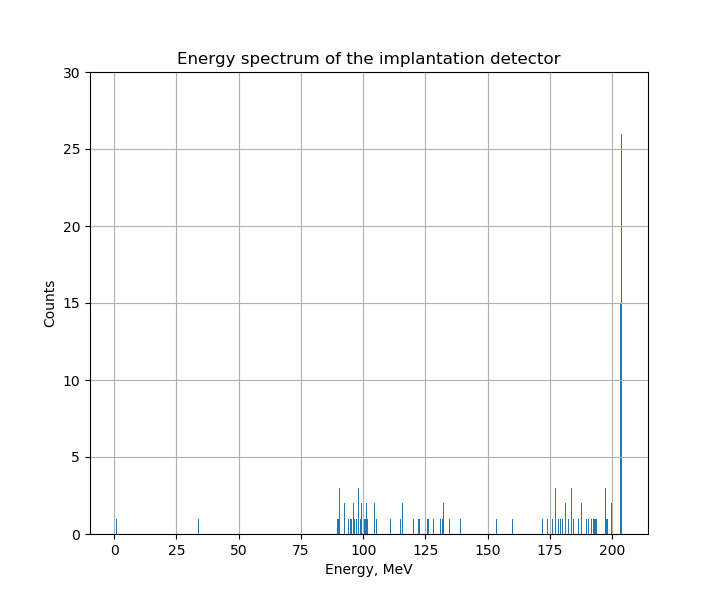

In [12]:
plt.figure(num=None, figsize=(7.2, 6))
ax_imp = E_imp_histo.plot.hist(grid=True,bins=10000)
ax_imp.set(title = 'Energy spectrum of the implantation detector', xlabel = 'Energy, MeV', ylabel = 'Counts')
ax_imp.set_ylim([0,30])
plt.savefig('implant_histogram.eps', format='eps', dpi=300)


## Constructing  a histogram for box detectors <a name="histo_box"></a>

Choose energies detected in the implantation detector

In [13]:
E_box_histo = asymm225.loc[(asymm225['DetID']>1024) & (asymm225['DetID']<2048)].Energy
E_box_histo

TKE    A1    A2   
225.0  80.0  208.0    36220.159466
             208.0    57303.944403
             208.0    37498.467656
             208.0    37804.762969
             208.0    56059.286660
                          ...     
             208.0    23242.576705
             208.0    50152.627861
             208.0     3440.366897
             208.0    14871.048305
             208.0    21140.290201
Name: Energy, Length: 625, dtype: float64

<IPython.core.display.Javascript object>


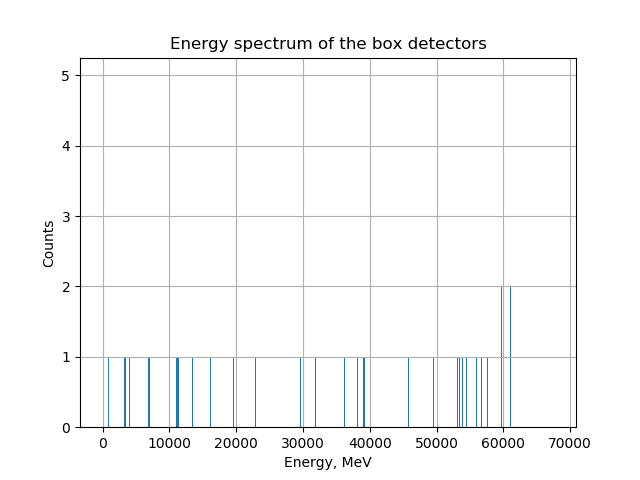

[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Energy, MeV'),
 Text(0.5, 1.0, 'Energy spectrum of the box detectors')]

In [14]:
plt.figure(num=None, figsize=(7.2, 6))
ax_box = E_box_histo.plot.hist(grid=True, bins=10000)
ax_box.set(title = 'Energy spectrum of the box detectors', xlabel = 'Energy, MeV', ylabel = 'Counts')
ax_box.set_ylim([0,5])
plt.savefig('box_histogram.eps', format='eps', dpi=300)